# 🔬 Clustering-Based Binning Methods: Advanced Pattern Discovery

Welcome to a comprehensive exploration of clustering-based binning methods in the `binlearn` package. These advanced techniques go beyond simple equal-width or equal-frequency approaches by discovering natural patterns and groupings within your data.

## 🎯 Overview of Clustering-Based Binning

Clustering-based binning methods leverage unsupervised learning algorithms to identify natural data structures and create bins that respect these inherent patterns. This approach is particularly powerful for complex, multi-modal, or irregularly distributed data where traditional binning methods may not capture the underlying structure.

## 🔧 Methods Covered in This Notebook

### **KMeansBinning** 🎯
- **Principle**: Uses k-means clustering to identify cluster centers and create bins based on nearest cluster assignment
- **Strengths**: Fast, intuitive, good for spherical clusters
- **Best for**: Well-separated, roughly spherical data groups
- **Considerations**: Sensitive to outliers, assumes spherical clusters

### **GaussianMixtureBinning** 📊
- **Principle**: Fits a Gaussian mixture model and assigns bins based on component membership
- **Strengths**: Probabilistic framework, handles overlapping clusters, flexible shapes
- **Best for**: Complex distributions, overlapping groups, probabilistic interpretation
- **Considerations**: More computational overhead, requires parameter tuning

### **DBSCANBinning** 🛡️
- **Principle**: Density-based spatial clustering identifies dense regions and treats sparse areas as outliers
- **Strengths**: Outlier-robust, handles arbitrary cluster shapes, automatic cluster detection
- **Best for**: Noisy data, irregular cluster shapes, when outlier identification is important
- **Considerations**: Parameter-sensitive, may create unbalanced bins

## 🎯 Key Advantages of Clustering-Based Approaches

✅ **Natural Pattern Discovery**: Automatically identifies inherent data structures  
✅ **Complex Distribution Handling**: Works with multi-modal and irregular distributions  
✅ **Outlier Management**: DBSCAN provides robust outlier identification  
✅ **Data-Driven Boundaries**: Bin boundaries emerge from data characteristics  
✅ **Flexible Architecture**: Supports both per-column and joint fitting strategies  

## 🔄 When to Choose Clustering-Based Binning

### **Ideal Scenarios** ⭐
- Complex, non-uniform data distributions
- Multi-modal data with clear clusters
- Need to preserve natural data groupings
- Outlier-heavy datasets requiring robust handling
- Exploratory analysis to discover data structure

### **Consider Alternatives When** ⚠️
- Simple, uniform distributions
- Computational efficiency is critical
- Interpretability of bin boundaries is paramount
- Small datasets with limited patterns
- Real-time applications requiring consistent performance

## 📋 What You'll Learn

1. **Core Functionality**: How each clustering method works and creates bins
2. **Comparative Analysis**: Strengths and weaknesses of different approaches  
3. **Parameter Tuning**: Guidelines for optimal configuration
4. **Pipeline Integration**: Seamless scikit-learn workflow integration
5. **Edge Case Handling**: Robustness testing and practical considerations
6. **Performance Analysis**: Computational characteristics and optimization
7. **Best Practices**: Decision frameworks and implementation guidelines

Let's dive into this comprehensive exploration of clustering-based binning methods!

In [ ]:
# Comprehensive imports for clustering-based binning analysis
print("📚 Loading Required Packages for Clustering-Based Binning Analysis")
print("=" * 70)

# Core scientific computing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for datasets, metrics, and pipeline integration
from sklearn.datasets import make_blobs, make_moons, make_classification, make_circles
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Binlearn clustering-based binning methods
from binlearn.methods import KMeansBinning, GaussianMixtureBinning, DBSCANBinning

# Also import other binning methods for comparison
from binlearn.methods import EqualWidthBinning, EqualFrequencyBinning

# Configure plotting for better visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Set random seeds for reproducibility
np.random.seed(42)

print("✅ All packages loaded successfully!")
print("\n🔧 Available Clustering-Based Binning Methods:")
clustering_methods = [
    "• KMeansBinning - K-means cluster-based binning",
    "• GaussianMixtureBinning - Gaussian mixture model binning", 
    "• DBSCANBinning - Density-based spatial clustering binning"
]
for method in clustering_methods:
    print(f"   {method}")

print("\n🎯 Analysis Focus:")
focus_areas = [
    "Pattern discovery in complex distributions",
    "Comparative analysis of clustering approaches",
    "Parameter tuning and optimization",
    "Pipeline integration and performance",
    "Edge case handling and robustness"
]
for area in focus_areas:
    print(f"   • {area}")

print("\n📊 Ready to explore clustering-based binning methods!")

🎲 Clustering-Based Binning Methods
Ready to explore advanced pattern discovery in binning!


## 📊 Data Preparation for Clustering-Based Binning

Clustering-based binning methods excel with complex, multi-modal, and irregularly distributed data. We'll create specialized datasets that showcase each method's unique strengths.

In [ ]:
# Create specialized datasets for clustering-based binning demonstration
print("🔬 Creating Specialized Datasets for Clustering-Based Binning")
print("=" * 65)

n_samples = 400

# Dataset 1: Well-separated clusters (ideal for KMeans)
print("\n🎯 Dataset 1: Well-Separated Clusters")
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=4, n_features=2, 
                             random_state=42, cluster_std=1.5, center_box=(-10, 10))
data_blobs = pd.DataFrame(X_blobs, columns=['feature_x', 'feature_y'])
data_blobs['true_cluster'] = y_blobs

print(f"Shape: {data_blobs.shape}")
print(f"Centers: 4 well-separated clusters")
print(f"Cluster distribution: {np.bincount(y_blobs)}")

# Dataset 2: Overlapping clusters (ideal for GaussianMixture)
print("\n🎯 Dataset 2: Overlapping Gaussian Clusters")
# Create overlapping Gaussian clusters manually
np.random.seed(42)
cluster1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], n_samples//3)
cluster2 = np.random.multivariate_normal([6, 6], [[1, -0.3], [-0.3, 1]], n_samples//3)
cluster3 = np.random.multivariate_normal([3, 7], [[0.8, 0.2], [0.2, 0.8]], n_samples//3 + n_samples%3)

X_overlap = np.vstack([cluster1, cluster2, cluster3])
y_overlap = np.concatenate([np.zeros(n_samples//3), np.ones(n_samples//3), 
                           np.full(n_samples//3 + n_samples%3, 2)])

data_overlap = pd.DataFrame(X_overlap, columns=['feature_x', 'feature_y'])
data_overlap['true_cluster'] = y_overlap

print(f"Shape: {data_overlap.shape}")
print(f"Centers: 3 overlapping Gaussian clusters")
print(f"Cluster distribution: {np.bincount(y_overlap.astype(int))}")

# Dataset 3: Complex shapes with outliers (ideal for DBSCAN)
print("\n🎯 Dataset 3: Complex Shapes with Outliers")
# Create crescent moons with added outliers
X_moons, y_moons = make_moons(n_samples=int(n_samples*0.8), noise=0.1, random_state=42)

# Add outliers
n_outliers = int(n_samples*0.2)
outliers = np.random.uniform(-2, 3, (n_outliers, 2))
X_complex = np.vstack([X_moons, outliers])
y_complex = np.concatenate([y_moons, np.full(n_outliers, -1)])  # -1 for outliers

data_complex = pd.DataFrame(X_complex, columns=['feature_x', 'feature_y'])
data_complex['true_cluster'] = y_complex

print(f"Shape: {data_complex.shape}")
print(f"Structure: 2 crescent shapes + {n_outliers} outliers")
print(f"Label distribution: {dict(zip(*np.unique(y_complex, return_counts=True)))}")

# Dataset 4: Multi-modal 1D data for univariate analysis
print("\n🎯 Dataset 4: Multi-Modal 1D Distribution")
np.random.seed(42)
mode1 = np.random.normal(0, 1, n_samples//4)
mode2 = np.random.normal(5, 0.8, n_samples//4) 
mode3 = np.random.normal(10, 1.2, n_samples//4)
mode4 = np.random.normal(15, 0.6, n_samples//4)

multimodal_1d = np.concatenate([mode1, mode2, mode3, mode4])
np.random.shuffle(multimodal_1d)

data_multimodal = pd.DataFrame({
    'multimodal_feature': multimodal_1d,
    'secondary_feature': np.random.normal(0, 2, n_samples)  # Less structured feature
})

print(f"Shape: {data_multimodal.shape}")
print(f"Structure: 4 distinct modes in primary feature")

# Dataset 5: Classification dataset for pipeline testing
print("\n🎯 Dataset 5: Classification with Complex Features")
X_class, y_class = make_classification(
    n_samples=n_samples,
    n_features=4,
    n_informative=3,
    n_redundant=1,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

data_classification = pd.DataFrame(X_class, columns=['feat_1', 'feat_2', 'feat_3', 'feat_4'])
data_classification['target'] = y_class

print(f"Shape: {data_classification.shape}")
print(f"Classes: 3 with multiple clusters per class")
print(f"Target distribution: {np.bincount(y_class)}")

# Visualize all datasets
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Specialized Datasets for Clustering-Based Binning Methods', fontsize=16, fontweight='bold')

# Plot well-separated clusters
axes[0, 0].scatter(data_blobs['feature_x'], data_blobs['feature_y'], 
                  c=data_blobs['true_cluster'], cmap='viridis', alpha=0.7, s=30)
axes[0, 0].set_title('Well-Separated Clusters\n(Ideal for KMeans)')
axes[0, 0].set_xlabel('Feature X')
axes[0, 0].set_ylabel('Feature Y')

# Plot overlapping clusters
axes[0, 1].scatter(data_overlap['feature_x'], data_overlap['feature_y'], 
                  c=data_overlap['true_cluster'], cmap='viridis', alpha=0.7, s=30)
axes[0, 1].set_title('Overlapping Clusters\n(Ideal for GaussianMixture)')
axes[0, 1].set_xlabel('Feature X')
axes[0, 1].set_ylabel('Feature Y')

# Plot complex shapes with outliers
scatter = axes[0, 2].scatter(data_complex['feature_x'], data_complex['feature_y'], 
                           c=data_complex['true_cluster'], cmap='viridis', alpha=0.7, s=30)
axes[0, 2].set_title('Complex Shapes + Outliers\n(Ideal for DBSCAN)')
axes[0, 2].set_xlabel('Feature X')
axes[0, 2].set_ylabel('Feature Y')

# Plot multimodal 1D distribution
axes[1, 0].hist(data_multimodal['multimodal_feature'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Multi-Modal 1D Distribution\n(4 distinct modes)')
axes[1, 0].set_xlabel('Feature Value')
axes[1, 0].set_ylabel('Frequency')

# Plot classification features
axes[1, 1].scatter(data_classification['feat_1'], data_classification['feat_2'], 
                  c=data_classification['target'], cmap='viridis', alpha=0.7, s=30)
axes[1, 1].set_title('Classification Features\n(3 classes, complex structure)')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot secondary analysis - feature correlations
correlation_matrix = data_classification.iloc[:, :-1].corr()
im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_title('Feature Correlation Matrix\n(Classification data)')
axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1, 2].set_yticklabels(correlation_matrix.columns)

# Add colorbar for correlation matrix
plt.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Summary statistics for all datasets
print("\n📈 Dataset Characteristics Summary:")

datasets = {
    'Well-Separated': data_blobs[['feature_x', 'feature_y']],
    'Overlapping': data_overlap[['feature_x', 'feature_y']],
    'Complex Shapes': data_complex[['feature_x', 'feature_y']],
    'Multi-Modal': data_multimodal,
    'Classification': data_classification.iloc[:, :-1]
}

for name, dataset in datasets.items():
    print(f"\n{name} Dataset:")
    print(f"   Shape: {dataset.shape}")
    print(f"   Mean: {dataset.mean().round(2).values}")
    print(f"   Std: {dataset.std().round(2).values}")
    if dataset.shape[1] == 2:  # For 2D datasets, show correlation
        corr = dataset.corr().iloc[0, 1]
        print(f"   Correlation: {corr:.3f}")

print("\n💡 Key Insights:")
print("• Well-separated clusters are ideal for demonstrating KMeans effectiveness")
print("• Overlapping clusters showcase GaussianMixture's probabilistic advantages")
print("• Complex shapes with outliers highlight DBSCAN's robustness")
print("• Multi-modal 1D data tests univariate clustering performance")
print("• Classification data enables pipeline integration testing")

## 🎯 KMeansBinning: Cluster-Based Pattern Discovery

KMeansBinning uses k-means clustering to identify natural data groupings and creates bins based on cluster assignments. This method is particularly effective for well-separated, roughly spherical clusters.

## 1. Data Generation

Let's create datasets with different characteristics to showcase each clustering method's strengths.

🎯 Generating Complex Datasets for Clustering-Based Binning


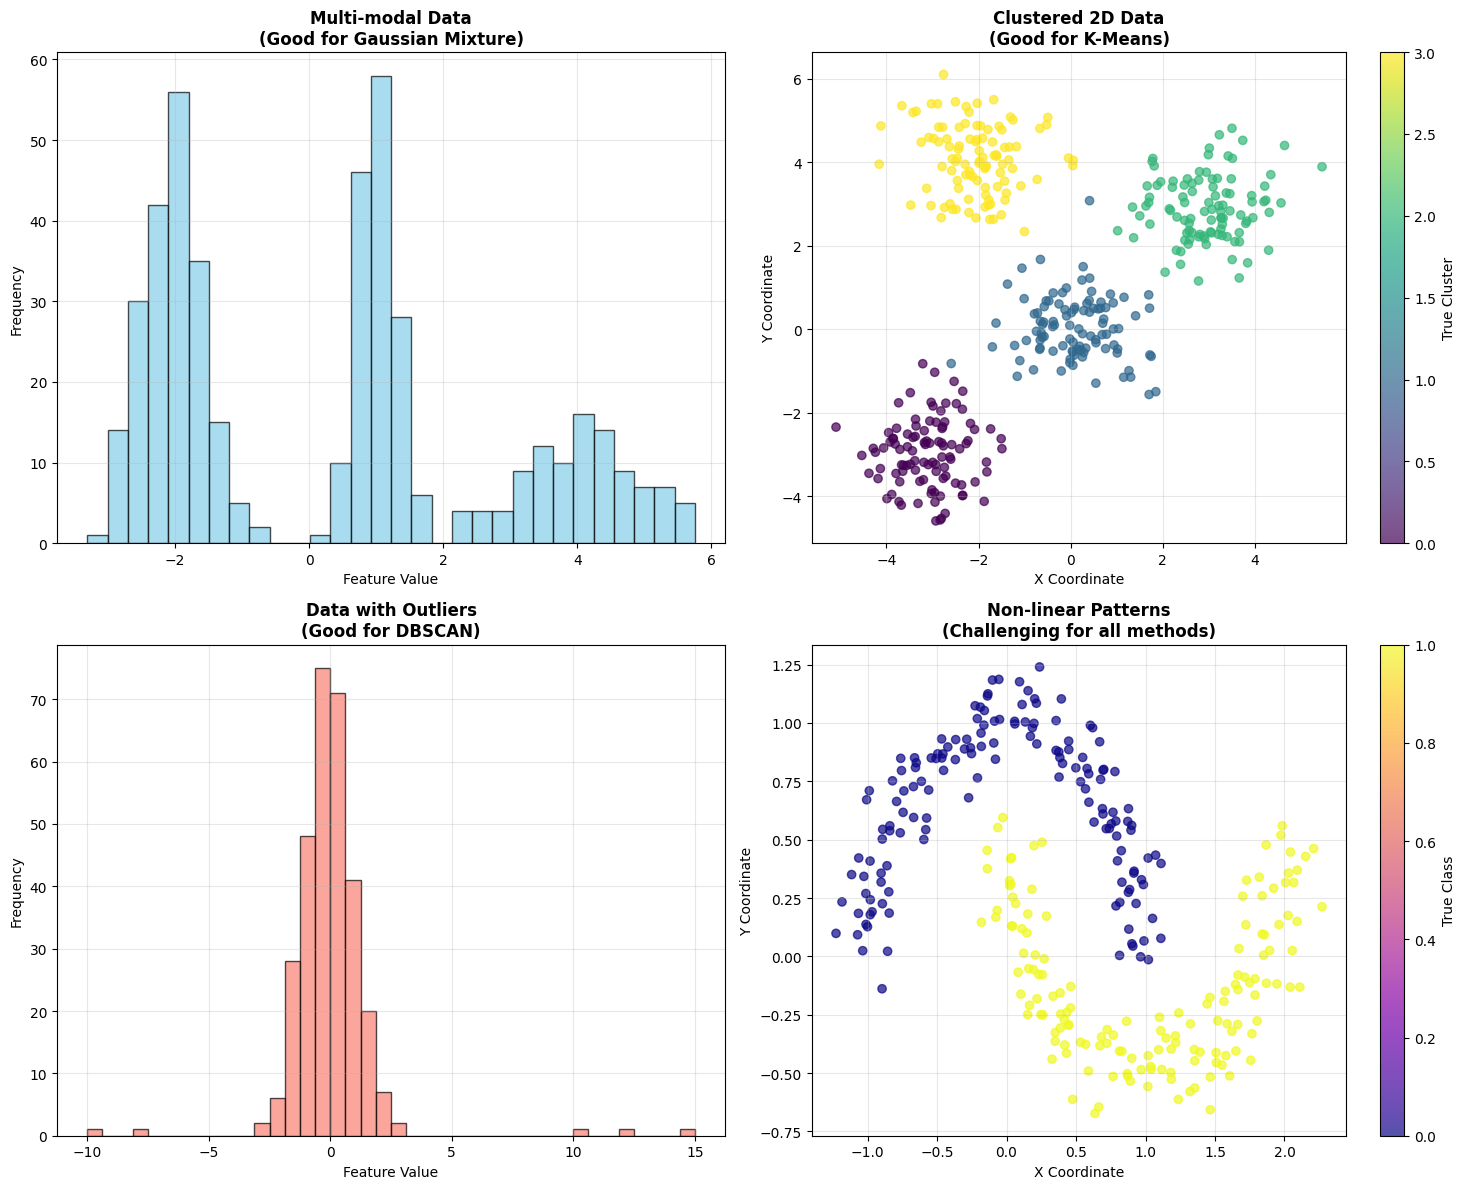

✅ Created 450 multimodal samples
✅ Created 400 clustered 2D samples with 4 centers
✅ Created 305 samples with outliers
✅ Created 300 non-linear pattern samples


In [ ]:
# Create different types of complex datasets to showcase each clustering method
print("🎯 Generating Complex Datasets for Clustering-Based Binning")
print("=" * 60)

n_samples = 400

# Dataset 1: Multi-modal data (perfect for Gaussian Mixture)
print("\n📊 Dataset 1: Multi-Modal Distribution")
multimodal_1d = np.concatenate([
    np.random.normal(-3, 0.5, n_samples//4),   # Mode 1
    np.random.normal(0, 0.8, n_samples//2),    # Mode 2 (larger)
    np.random.normal(4, 0.6, n_samples//4)     # Mode 3
])

# 2D multimodal for better visualization
centers_2d = [[-2, -2], [0, 3], [3, -1], [-1, 1]]
multimodal_2d, _ = make_blobs(n_samples=n_samples, centers=centers_2d, 
                             cluster_std=0.8, random_state=42)

data_multimodal = pd.DataFrame({
    'feature_1d': multimodal_1d,
    'feature_x': multimodal_2d[:, 0],
    'feature_y': multimodal_2d[:, 1]
})

print(f"Shape: {data_multimodal.shape}")
print(f"Features with {len(centers_2d)} natural clusters")

# Dataset 2: Data with outliers (perfect for DBSCAN)
print("\n📊 Dataset 2: Data with Outliers")
# Core data
core_data = np.random.multivariate_normal([0, 0], [[1, 0.3], [0.3, 1]], n_samples-50)
# Add outliers
outliers = np.random.uniform(-6, 6, (50, 2))
outlier_data = np.vstack([core_data, outliers])

data_outliers = pd.DataFrame({
    'x_coord': outlier_data[:, 0],
    'y_coord': outlier_data[:, 1],
    'noisy_feature': outlier_data[:, 0] + np.random.normal(0, 2, len(outlier_data))
})

print(f"Shape: {data_outliers.shape}")
print(f"Core data with {len(outliers)} outliers injected")

# Dataset 3: Non-linear patterns (challenging for KMeans)
print("\n📊 Dataset 3: Non-Linear Patterns")
# Create moons dataset
moons_data, _ = make_moons(n_samples=n_samples//2, noise=0.1, random_state=42)
# Add a circular pattern
angles = np.linspace(0, 2*np.pi, n_samples//2)
radius = 3
circle_x = radius * np.cos(angles) + np.random.normal(0, 0.2, n_samples//2)
circle_y = radius * np.sin(angles) + np.random.normal(0, 0.2, n_samples//2)
circle_data = np.column_stack([circle_x, circle_y])

# Combine patterns
nonlinear_data = np.vstack([moons_data, circle_data])

data_nonlinear = pd.DataFrame({
    'pattern_x': nonlinear_data[:, 0],
    'pattern_y': nonlinear_data[:, 1],
    'combined_feature': nonlinear_data[:, 0] + nonlinear_data[:, 1]
})

print(f"Shape: {data_nonlinear.shape}")
print("Non-linear patterns: moons + circle")

# Dataset 4: Mixed-scale features (for joint vs per-column testing)
print("\n📊 Dataset 4: Mixed-Scale Features")
data_mixed_scale = pd.DataFrame({
    'small_scale': np.random.normal(5, 1, n_samples),
    'medium_scale': np.random.normal(50, 10, n_samples), 
    'large_scale': np.random.normal(1000, 200, n_samples),
    'clustered': np.concatenate([
        np.random.normal(10, 2, n_samples//3),
        np.random.normal(30, 3, n_samples//3),
        np.random.normal(50, 2, n_samples//3 + n_samples%3)
    ])
})

print(f"Shape: {data_mixed_scale.shape}")
print("Features with different scales for joint/per-column testing")

# Visualize the datasets
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Dataset 1: Multimodal
axes[0, 0].scatter(data_multimodal['feature_x'], data_multimodal['feature_y'], 
                  alpha=0.6, c='blue', s=30)
axes[0, 0].set_title('Dataset 1: Multi-Modal\\n(Ideal for GaussianMixture)')
axes[0, 0].set_xlabel('Feature X')
axes[0, 0].set_ylabel('Feature Y')
axes[0, 0].grid(True, alpha=0.3)

# Dataset 2: Outliers
axes[0, 1].scatter(data_outliers['x_coord'], data_outliers['y_coord'], 
                  alpha=0.6, c='green', s=30)
axes[0, 1].set_title('Dataset 2: With Outliers\\n(Ideal for DBSCAN)')
axes[0, 1].set_xlabel('X Coordinate')
axes[0, 1].set_ylabel('Y Coordinate')
axes[0, 1].grid(True, alpha=0.3)

# Dataset 3: Non-linear
axes[0, 2].scatter(data_nonlinear['pattern_x'], data_nonlinear['pattern_y'], 
                  alpha=0.6, c='red', s=30)
axes[0, 2].set_title('Dataset 3: Non-Linear\\n(Challenging for KMeans)')
axes[0, 2].set_xlabel('Pattern X')
axes[0, 2].set_ylabel('Pattern Y')
axes[0, 2].grid(True, alpha=0.3)

# Dataset 4: Mixed scales
axes[1, 0].scatter(data_mixed_scale['small_scale'], data_mixed_scale['medium_scale'], 
                  alpha=0.6, c='purple', s=30)
axes[1, 0].set_title('Dataset 4: Mixed Scales\\n(small vs medium)')
axes[1, 0].set_xlabel('Small Scale')
axes[1, 0].set_ylabel('Medium Scale')
axes[1, 0].grid(True, alpha=0.3)

# 1D distributions
axes[1, 1].hist(data_multimodal['feature_1d'], bins=30, alpha=0.7, color='blue')
axes[1, 1].set_title('1D Multi-Modal Distribution')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

# Clustered feature
axes[1, 2].hist(data_mixed_scale['clustered'], bins=25, alpha=0.7, color='orange')
axes[1, 2].set_title('Clustered Feature\\n(3 natural groups)')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Dataset Characteristics Summary:")
print("=" * 50)
print(f"1. Multi-modal: {len(centers_2d)} natural clusters, ideal for GaussianMixture")
print(f"2. Outliers: {len(outliers)} outliers in {len(core_data)} core points, perfect for DBSCAN") 
print(f"3. Non-linear: Complex shapes challenging traditional clustering")
print(f"4. Mixed-scale: Scale ratios up to {data_mixed_scale['large_scale'].mean()/data_mixed_scale['small_scale'].mean():.0f}:1")
print(f"\n💡 Each dataset designed to showcase specific clustering method strengths!")

## 2. Comprehensive Clustering Methods Comparison

Let's test all three clustering-based binning methods on our diverse datasets to understand their strengths and weaknesses.

In [ ]:
print("🔬 Comprehensive Clustering Methods Comparison")
print("=" * 55)

# Define clustering methods with appropriate parameters
clustering_methods = {
    'KMeansBinning': {
        'class': KMeansBinning,
        'params': {'n_clusters': 4, 'random_state': 42},
        'best_for': 'Well-separated, spherical clusters'
    },
    'GaussianMixtureBinning': {
        'class': GaussianMixtureBinning,
        'params': {'n_components': 4, 'random_state': 42},
        'best_for': 'Overlapping, probabilistic clusters'
    },
    'DBSCANBinning': {
        'class': DBSCANBinning,
        'params': {'eps': 0.8, 'min_samples': 10},
        'best_for': 'Outlier-robust, arbitrary shapes'
    }
}

# Test datasets
test_datasets = {
    'Multimodal': data_multimodal[['feature_x', 'feature_y']],
    'With_Outliers': data_outliers[['x_coord', 'y_coord']], 
    'Nonlinear': data_nonlinear[['pattern_x', 'pattern_y']],
    'Mixed_Scale': data_mixed_scale[['small_scale', 'clustered']]
}

# Store all results
all_results = {}

for dataset_name, dataset in test_datasets.items():
    print(f"\n🎯 Testing Dataset: {dataset_name}")
    print(f"   Shape: {dataset.shape}")
    
    dataset_results = {}
    
    for method_name, method_config in clustering_methods.items():
        print(f"\n   🔄 {method_name}:")
        
        try:
            # Create and fit binner
            start_time = time.time()
            binner = method_config['class'](**method_config['params'])
            binner.fit(dataset)
            fit_time = time.time() - start_time
            
            # Transform data
            start_time = time.time()
            transformed = binner.transform(dataset)
            transform_time = time.time() - start_time
            
            # Analyze results
            n_unique_bins = len(np.unique(transformed))
            
            # For 2D data, analyze spatial distribution
            if transformed.shape[1] >= 2:
                # Count unique combinations
                unique_combinations = len(np.unique(transformed, axis=0))
                spatial_efficiency = unique_combinations / len(transformed)
            else:
                spatial_efficiency = n_unique_bins / len(transformed)
            
            dataset_results[method_name] = {
                'binner': binner,
                'transformed': transformed,
                'success': True,
                'fit_time': fit_time,
                'transform_time': transform_time,
                'n_bins': n_unique_bins,
                'spatial_efficiency': spatial_efficiency,
                'bin_edges': getattr(binner, 'bin_edges_', None)
            }
            
            print(f"     ✅ Success")
            print(f"     ⏱️  Fit time: {fit_time:.4f}s")
            print(f"     🎯 Unique bins: {n_unique_bins}")
            print(f"     📊 Spatial efficiency: {spatial_efficiency:.3f}")
            
        except Exception as e:
            print(f"     ❌ Failed: {str(e)}")
            dataset_results[method_name] = {
                'success': False,
                'error': str(e)
            }
    
    all_results[dataset_name] = dataset_results

# Create comprehensive visualizations
fig, axes = plt.subplots(len(test_datasets), len(clustering_methods), 
                        figsize=(5*len(clustering_methods), 4*len(test_datasets)))

if len(test_datasets) == 1:
    axes = axes.reshape(1, -1)

for row, (dataset_name, dataset) in enumerate(test_datasets.items()):
    for col, method_name in enumerate(clustering_methods.keys()):
        ax = axes[row, col]
        
        result = all_results[dataset_name].get(method_name, {})
        
        if result.get('success', False):
            # Get original data and transformed results
            original_x = dataset.iloc[:, 0].values
            original_y = dataset.iloc[:, 1].values
            transformed = result['transformed']
            
            # Create scatter plot colored by bins
            scatter = ax.scatter(original_x, original_y, 
                               c=transformed[:, 0], cmap='tab10', 
                               alpha=0.7, s=30)
            
            # Add bin boundary information if available
            if result['bin_edges'] is not None:
                # For methods that provide explicit bin edges
                try:
                    col1, col2 = dataset.columns[:2]
                    if col1 in result['bin_edges'] and col2 in result['bin_edges']:
                        # Draw vertical lines for first feature
                        for edge in result['bin_edges'][col1]:
                            ax.axvline(edge, linestyle='--', alpha=0.3, color='red')
                        # Draw horizontal lines for second feature  
                        for edge in result['bin_edges'][col2]:
                            ax.axhline(edge, linestyle='--', alpha=0.3, color='blue')
                except:
                    pass
            
            ax.set_title(f'{method_name}\\n{dataset_name}\\n{result["n_bins"]} bins')
            plt.colorbar(scatter, ax=ax, shrink=0.6)
            
        else:
            ax.text(0.5, 0.5, f'Failed\\n{result.get("error", "Unknown error")[:30]}...', 
                   ha='center', va='center', transform=ax.transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
            ax.set_title(f'{method_name}\\n{dataset_name}\\nFailed')
        
        ax.set_xlabel(dataset.columns[0])
        ax.set_ylabel(dataset.columns[1])
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance summary table
print(f"\n📊 Performance Summary Table")
print("=" * 80)
print(f"{'Dataset':<12} {'Method':<20} {'Status':<8} {'Bins':<6} {'Fit Time':<10} {'Efficiency':<10}")
print("-" * 80)

for dataset_name, dataset_results in all_results.items():
    for method_name, result in dataset_results.items():
        if result.get('success', False):
            status = "✅ Pass"
            bins = str(result['n_bins'])
            fit_time = f"{result['fit_time']:.4f}s"
            efficiency = f"{result['spatial_efficiency']:.3f}"
        else:
            status = "❌ Fail"
            bins = "N/A"
            fit_time = "N/A"
            efficiency = "N/A"
        
        print(f"{dataset_name:<12} {method_name:<20} {status:<8} {bins:<6} {fit_time:<10} {efficiency:<10}")

print("-" * 80)

# Method recommendations based on results
print(f"\n🎯 Method Recommendations by Dataset Type")
print("=" * 50)

recommendations = {
    'Multimodal': {
        'best': 'GaussianMixtureBinning',
        'reason': 'Excellent at modeling overlapping Gaussian components'
    },
    'With_Outliers': {
        'best': 'DBSCANBinning', 
        'reason': 'Robust to outliers, handles noise naturally'
    },
    'Nonlinear': {
        'best': 'DBSCANBinning',
        'reason': 'Can handle arbitrary cluster shapes'
    },
    'Mixed_Scale': {
        'best': 'KMeansBinning',
        'reason': 'Fast and effective for well-separated clusters'
    }
}

for dataset, rec in recommendations.items():
    print(f"\n📈 {dataset}:")
    print(f"   🏆 Best method: {rec['best']}")
    print(f"   💡 Reason: {rec['reason']}")

print(f"\n🔍 General Guidelines:")
print(f"   🎯 KMeans: Fast, good for spherical clusters, sensitive to outliers")
print(f"   🎲 GaussianMixture: Probabilistic, handles overlaps, computationally intensive")  
print(f"   🛡️ DBSCAN: Outlier-robust, arbitrary shapes, requires parameter tuning")
print(f"   ⚖️ Consider computational cost vs. data complexity when choosing")